# Read data

In [2]:
import numpy as np
import pandas as pd
from itertools import chain

In [3]:
# Create column names based on description provided by the dataset creators

operational_settings = ['OpSetting' + str(i) for i in range(1,4)]
sensors = ['Sensor' + str(i) for i in range(1,22)]
setting_measurement_names = list(chain(*[operational_settings, sensors]))
column_names = ['Unit', 'Time'] + setting_measurement_names

In [4]:
# Read data (here is train_FD002.txt)

df = pd.read_table("CMAPSSData/train_FD002.txt", header=None, sep="\s+")
df.columns = column_names
df = df[df['Unit']<=100]

In [5]:
df.head()

,Unit,Time,OpSetting1,OpSetting2,OpSetting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [6]:
# Calculate runtime for each unit before failure

RunTimes = df.groupby(['Unit']).count()['Time']
len(RunTimes)

100

In [7]:
# Remove columns (if any) that have the same value in all rows

nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1)
df.head()

,Unit,Time,OpSetting1,OpSetting2,OpSetting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [8]:
df.shape

(20210, 26)

In [9]:
# Normalize operational settings and sensor measurements (here is Z-score standardization)

normalized_values = df[setting_measurement_names].apply(lambda x: (x - np.mean(x))/np.std(x), axis=0)

In [76]:
other_normalized_values = df[setting_measurement_names].apply(lambda x: (x - np.min(x))/(np.max(x) - np.min(x)), axis=0)
other_normalized_values

,OpSetting1,OpSetting2,OpSetting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,0.833134,0.997625,1.0,0.060269,0.180681,0.307263,0.261884,0.146592,0.144025,0.138122,...,0.136180,0.992394,0.469167,0.368699,0.0,0.319149,0.651163,1.0,0.155853,0.152191
1,0.999767,0.998575,1.0,0.000000,0.130819,0.292462,0.233900,0.000000,0.000000,0.004083,...,0.002464,0.992229,0.526464,0.380182,0.0,0.276596,0.627907,1.0,0.007552,0.006332
2,0.595096,0.738480,0.0,0.238089,0.014995,0.027571,0.042454,0.293184,0.208176,0.092917,...,0.088323,0.001157,0.025825,0.936606,0.0,0.053191,0.000000,0.0,0.133539,0.144452
3,0.999993,0.999525,1.0,0.000000,0.127231,0.294686,0.235366,0.000000,0.000000,0.003964,...,0.003226,0.992091,0.517679,0.371157,0.0,0.265957,0.627907,1.0,0.013732,0.018021
4,0.595137,0.736698,0.0,0.238089,0.012787,0.030180,0.043627,0.293184,0.208805,0.091341,...,0.088551,0.001075,0.017040,0.937413,0.0,0.053191,0.000000,0.0,0.135256,0.136202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20205,0.999807,0.999762,1.0,0.000000,0.137167,0.326431,0.269486,0.000000,0.000629,0.002985,...,0.001651,0.993855,0.595612,0.399296,0.0,0.308511,0.627907,1.0,0.013045,0.001275
20206,0.999871,0.999525,1.0,0.000000,0.136707,0.325855,0.260736,0.000000,0.000629,0.005158,...,0.001575,0.994075,0.612531,0.396911,0.0,0.319149,0.627907,1.0,0.015105,0.009525
20207,0.833244,0.997625,1.0,0.060269,0.194756,0.349801,0.288623,0.146592,0.144654,0.134397,...,0.135647,0.994323,0.570729,0.403588,0.0,0.340426,0.651163,1.0,0.156196,0.151990
20208,0.833306,0.997625,1.0,0.060269,0.191444,0.366717,0.297177,0.146592,0.144025,0.136713,...,0.135977,0.994516,0.557720,0.393462,0.0,0.340426,0.651163,1.0,0.152077,0.148615


In [10]:
# Normalize b/w 0-1 the running times for each unit and reverse to reflect remaining life

normalized_time = []

cntr = 0
for i in range(1,len(RunTimes)+1):
    chunk = list(df['Time'][cntr:cntr+RunTimes[i]]/RunTimes[i])
    normalized_time.append(chunk[len(chunk)-1::-1])
    cntr += RunTimes[i]
normalized_time = list(chain(*normalized_time))
normalized_time = pd.DataFrame(normalized_time, columns=['NormTime'])

In [11]:
# Create the updated dataframe with the normalized/standardized data

new_df = pd.concat([df['Unit'], normalized_time, normalized_values], axis=1)

In [12]:
new_df.head()

,Unit,NormTime,OpSetting1,OpSetting2,OpSetting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1.000000,0.742220,0.860505,0.421102,-0.886658,-0.648122,-0.571822,-0.564899,-0.702707,...,-0.598511,0.418081,-0.203449,0.016450,-0.698334,-0.508009,-0.034332,0.421102,-0.609775,-0.614913
1,1,0.993289,1.217528,0.863091,0.421102,-1.054982,-0.793420,-0.622652,-0.661060,-1.137499,...,-0.981202,0.417615,0.075890,0.058136,-0.698334,-0.652042,-0.109758,0.421102,-1.047880,-1.044312
2,1,0.986577,0.063232,0.155011,-2.374719,-0.390026,-1.130929,-1.532308,-1.318903,-0.267914,...,-0.735477,-2.376948,-2.364856,2.078101,-0.698334,-1.408218,-2.146268,-2.374719,-0.675694,-0.637697
3,1,0.979866,1.218173,0.865678,0.421102,-1.054982,-0.803875,-0.615013,-0.656021,-1.137499,...,-0.979021,0.417226,0.033059,0.025373,-0.698334,-0.688051,-0.109758,0.421102,-1.029626,-1.009900
4,1,0.973154,0.063348,0.150161,-2.374719,-0.390026,-1.137363,-1.523349,-1.314872,-0.267914,...,-0.734823,-2.377181,-2.407686,2.081031,-0.698334,-1.408218,-2.146268,-2.374719,-0.670623,-0.661984


In [13]:
new_df.isnull().sum()

Unit          0
NormTime      0
OpSetting1    0
OpSetting2    0
OpSetting3    0
Sensor1       0
Sensor2       0
Sensor3       0
Sensor4       0
Sensor5       0
Sensor6       0
Sensor7       0
Sensor8       0
Sensor9       0
Sensor10      0
Sensor11      0
Sensor12      0
Sensor13      0
Sensor14      0
Sensor15      0
Sensor16      0
Sensor17      0
Sensor18      0
Sensor19      0
Sensor20      0
Sensor21      0
dtype: int64

In [14]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt

In [66]:
mtf = MarkovTransitionField(image_size=25)

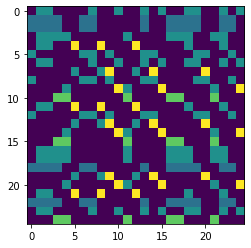

In [69]:
images = mtf.transform(new_df[list(chain(*[['NormTime'], setting_measurement_names]))])
plt.imshow(images[30])
plt.show()

# Testing for Encoder

In [18]:
import tensorflow as tf

In [19]:
filters = [8,16]
kernel = 2
stride = 2
neurons = 4

In [20]:
def Sampling(inputs):
    x_mean, x_logvar = inputs
    batch = tf.shape(x_mean)[0]
    dim = tf.shape(x_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))

    return x_mean + tf.exp(0.5 * x_logvar) * epsilon

In [24]:
op_filters, sens_filters = filters
padding = 'same'

encoder_inputs = tf.keras.Input(shape=(24,24,1))
time_inputs = tf.keras.Input(shape=(1,))
x = tf.keras.layers.Conv2D(filters=filters[0], kernel_size=kernel, strides=stride, activation='relu', padding=padding, name="conv2D_layer_1")(encoder_inputs)
x = tf.keras.layers.Conv2D(filters=filters[1], kernel_size=kernel, strides=stride, activation='relu', padding=padding, name="conv2D_layer_2")(x)
x = tf.keras.layers.Flatten(name="flattened")(x)
x = tf.keras.layers.concatenate([x,time_inputs], name="concatenate")
z = tf.keras.layers.Dense(neurons, activation='relu', name="dense_layer")(x)

x_mean = tf.keras.layers.Dense(1, name="x_mean")(z)
x_logvar = tf.keras.layers.Dense(1, name="x_logvar")(z)
x = Sampling([x_mean, x_logvar])

encoder = tf.keras.Model([encoder_inputs, time_inputs], [x_mean, x_logvar, x], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 24, 24, 1)]  0           []                               
                                                                                                  
 conv2D_layer_1 (Conv2D)        (None, 12, 12, 8)    40          ['input_7[0][0]']                
                                                                                                  
 conv2D_layer_2 (Conv2D)        (None, 6, 6, 16)     528         ['conv2D_layer_1[0][0]']         
                                                                                                  
 flattened (Flatten)            (None, 576)          0           ['conv2D_layer_2[0][0]']         
                                                                                            

In [57]:
encoder.get_layer('conv2D_layer_2').output_shape[1:]

(6, 6, 16)

In [41]:
new_df['NormTime'].shape[0]

20210

In [73]:
images[0].shape

(25, 25)

In [51]:
tf.expand_dims(new_df['NormTime'], -1)

<tf.Tensor: shape=(20210, 1), dtype=float64, numpy=
array([[1.        ],
       [0.99328859],
       [0.98657718],
       ...,
       [0.01415094],
       [0.00943396],
       [0.00471698]])>

In [49]:
(images[0], new_df['NormTime'].iloc[0])

(array([[0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.        ,
         0.        , 0.        , 0.33333333, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.        ,
         0.        , 0.        , 0.33333333, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.        ,
         0.        , 0.        , 0.33333333, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        ]

In [59]:
t = encoder.get_layer("concatenate")
type(t)

keras.layers.merge.Concatenate

In [72]:
np.expand_dims(images[0], -1).astype("float32").shape

(25, 25, 1)